# Assignment 4

**Dataset:** Social Network Ads Dataset
\
**Steps:**


1.   EDA
2.   Create a Linear SVM Model for classification
3.   Create a model for polynomial and Gaussianradial basis kernel fucntions
4. Visualize hyperplane of all your nodes


## EDA

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#Train and Test split
from sklearn.model_selection import train_test_split

#Classification
from sklearn.svm import SVC

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score

#Remove warnings
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  #used to ignore warnings while executing


In [21]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Observation**
Only Gender column is categorical.

In [22]:
df.shape

(400, 5)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Observation** No missing values.

In [24]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


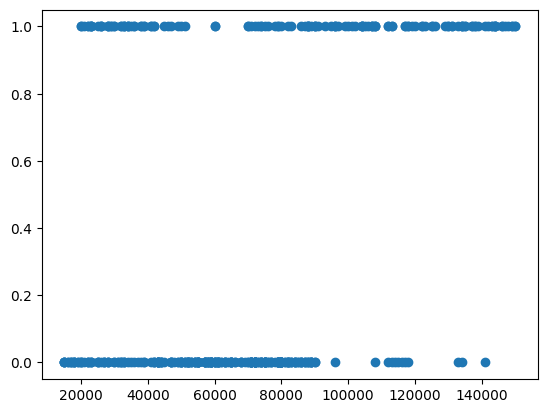

In [25]:
plt.scatter(df.EstimatedSalary, df.Purchased)
plt.show()

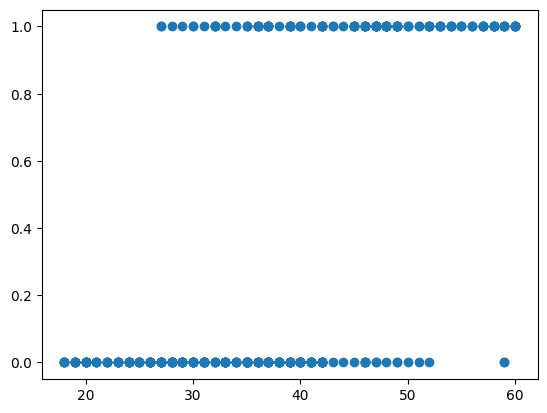

In [26]:
plt.scatter(df.Age, df.Purchased)
plt.show()

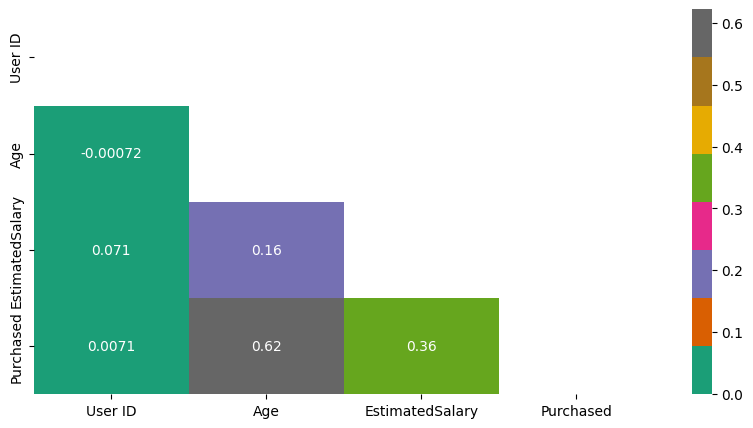

In [27]:
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

In [28]:
correlation = pd.DataFrame(df.corr().Purchased)
correlation

,Purchased
User ID,0.007120
Age,0.622454
EstimatedSalary,0.362083
Purchased,1.000000


**Observation**
The column of User ID is insignificance in determining the target, so it can be deleted.

In [29]:
df.drop('User ID', axis = 1, inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [30]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

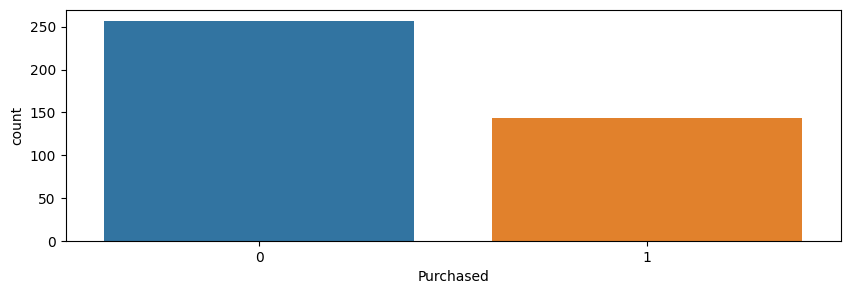

In [31]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Purchased",data=df)
plt.show()

**Observation**

It is clear that number customers purchased from social networking advertisment is far less that total customers viewed the advertisement.

<Figure size 1000x300 with 0 Axes>

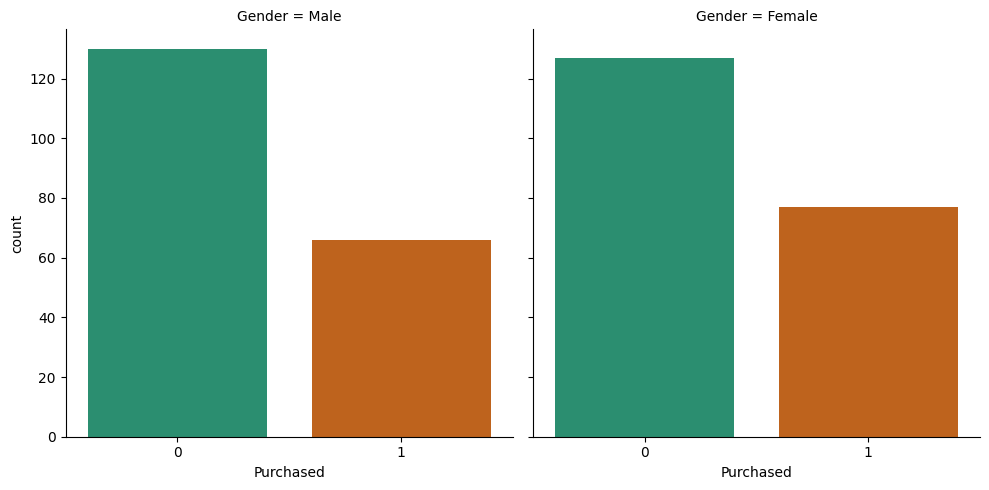

In [32]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Purchased', col='Gender', kind='count', data=df,palette="Dark2");
plt.show()

In [33]:
pd.crosstab(df.Gender,df.Purchased,normalize = "index" ).style.background_gradient(cmap='crest')

Purchased,0,1
Gender,,
Female,0.622549,0.377451
Male,0.663265,0.336735


**Observation**

37.74% of female customers purchased a product from social networking advertisment where as only 33.67% of male customers purchased from social networking advertisment.

## SVM

### Encoding Categorical Data

In [34]:
df = pd.get_dummies(df, columns = ['Gender'], drop_first=True)
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


### Splitting Dataset

In [35]:
X = df.drop(['Purchased'],axis = 1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [36]:
cols = X_train.columns
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

### Support Vector Machine (SVM)

In [37]:
classifierLin = SVC(kernel = 'linear')
classifierLin.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
classifierLin.gamma
classifierLin.C

1.0

In [39]:
y_pred_svc = classifierLin.predict(X_test)

In [40]:
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

**Confusion Matrix**

In [41]:
cm2 = confusion_matrix(y_test, y_pred_svc)
print(cm2)

[[66  2]
 [ 9 23]]


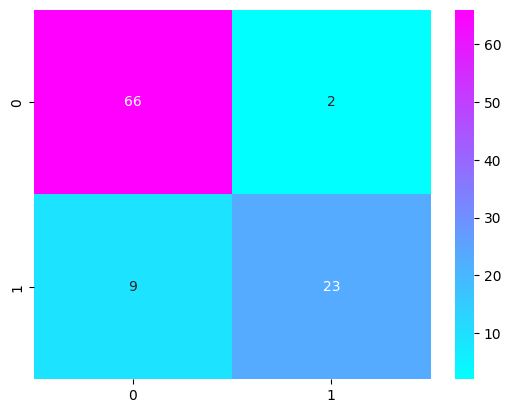

In [42]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='cool')
plt.show()

**Observation**
11 out of 100, are wrongly predicted.

In [43]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        68
           1       0.92      0.72      0.81        32

    accuracy                           0.89       100
   macro avg       0.90      0.84      0.87       100
weighted avg       0.89      0.89      0.89       100



**Observation**
- Accuracy is 89% but 
- Recall for purchased is only 72%.

In [44]:
classifierrbf = SVC(kernel = 'rbf')
classifierrbf.fit(X_train, y_train)

SVC()

In [45]:
classifierrbf.C

1.0

In [46]:
classifierrbf.gamma

'scale'

In [47]:
y_pred_rbf = classifierrbf.predict(X_test)
y_pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [48]:
cm3 = confusion_matrix(y_test, y_pred_rbf)
print(cm3)

[[64  4]
 [ 3 29]]


**Observation**
Only 7 out of 100 are wrongly predicted

In [49]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



**Final Observations**
- Overall Accuracy is 93% 
- Precision, Recall and F1-score for predicting not purchased category is above 94% and for purchased category is close to 90%**